<a href="https://colab.research.google.com/github/itayzaada/Complex-Networks-Unicorn-Companies-analysis/blob/main/Complex_Networks_Unicorn_Companies_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data import with pandas ##

In [2]:
import pandas as pd
import requests
from io import StringIO

In [11]:
csv_url = 'https://raw.githubusercontent.com/itayzaada/Complex-Networks-Unicorn-Companies-analysis/master/Unicorn_Companies.csv'
df = pd.read_csv(csv_url,index_col=0,parse_dates=[0])

In [13]:
len(df)

1037

In [ ]:
## import packages ##
import numpy as np
import pandas as pd
import os
import kaggle
import os
import kaggle
import zipfile

# make dataframe from the csv #
df = pd.read_csv(file_name)
print(len(df))
df.head()

1037


,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,$7.44B,IPO,28,8,5
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,$6.874B,None,29,12,None
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,$2.901B,Asset,39,12,1
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,$3.472B,Acquired,56,13,1
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,$4.377B,Acquired,25,5,2


#Data prep ##
##Create network that conect investors according to the company they invested in ##

In [ ]:
lst_dict = []
# break the Select Inverstors col to single investor where each row will represent an investor and company with the company featuers ##
for index, row in df.iterrows():
    for j in row['Select Inverstors'].split(", ") :
        lst_dict.append({'Company':row['Company'],
                         'Investor':j,
                         'Valuation ($B)':row['Valuation ($B)']
                         , 'Date Joined':row['Date Joined']
                        , 'Country':row['Country']
                        , 'City':row['City']
                        , 'Industry':row['Industry']
                        , 'Founded Year ':row['Founded Year'],
                         'Total Raised':row['Total Raised'],
                         'Financial Stage':row['Financial Stage'],
                         'Investors Count':row['Investors Count'],
                         'Deal Terms':row['Deal Terms'],
                        'Portfolio Exits':row['Portfolio Exits'],})
## make the dict datframe ##
df2=pd.DataFrame(lst_dict)
print(df2.columns)
df2.head()

Index(['Company', 'Investor', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Founded Year ', 'Total Raised', 'Financial Stage',
       'Investors Count', 'Deal Terms', 'Portfolio Exits'],
      dtype='object')


,Company,Investor,Valuation ($B),Date Joined,Country,City,Industry,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,Sequoia Capital China,$140,4/7/2017,China,Beijing,Artificial intelligence,2012,$7.44B,IPO,28,8,5
1,Bytedance,SIG Asia Investments,$140,4/7/2017,China,Beijing,Artificial intelligence,2012,$7.44B,IPO,28,8,5
2,Bytedance,Sina Weibo,$140,4/7/2017,China,Beijing,Artificial intelligence,2012,$7.44B,IPO,28,8,5
3,Bytedance,Softbank Group,$140,4/7/2017,China,Beijing,Artificial intelligence,2012,$7.44B,IPO,28,8,5
4,SpaceX,Founders Fund,$100.3,12/1/2012,United States,Hawthorne,Other,2002,$6.874B,None,29,12,None


### create function that convert the total raised to acctual number

In [ ]:

##function that takes the column Total Raised	 that have letters inside and return number in milions ##
def convert_to_number(value):
    if value is None or pd.isnull(value) or value=='None':
        return 0
    else:
        multiplier = 1
        if value.endswith("B"):
            multiplier = 1e3  # Convert billions to number
            value = value.replace("B", "")
        if value.endswith("M"):
            multiplier = 1  # Convert millions to number
            value = value.replace("M", "")
        if value.endswith("K"):
            multiplier = 1e-3  # Convert thousands to number
            value = value.replace("K", "")
        value = value.replace("$", "")  # Remove the dollar sign ($) from the value
    return float(value) * multiplier

df2.replace([np.inf, -np.inf], np.nan, inplace=True)
## we assume that each investor maid the same investment ##
df2['investment_M']=df2['Total Raised'].apply(convert_to_number)/df2['Investors Count'].str.replace('None', '0').fillna(0).astype(float)

df2. head()
# df2['investment'] = df2['Total Raised'].str.replace('B', '').str.replace('$', '').str.replace('M', '').str.replace('K', '').str.replace('None', '0').fillna(0).astype(float) / df2['Investors Count'].str.replace('None', '0').fillna(0).astype(float)


,Company,Investor,Valuation ($B),Date Joined,Country,City,Industry,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits,investment_M
0,Bytedance,Sequoia Capital China,$140,4/7/2017,China,Beijing,Artificial intelligence,2012,$7.44B,IPO,28,8,5,265.714286
1,Bytedance,SIG Asia Investments,$140,4/7/2017,China,Beijing,Artificial intelligence,2012,$7.44B,IPO,28,8,5,265.714286
2,Bytedance,Sina Weibo,$140,4/7/2017,China,Beijing,Artificial intelligence,2012,$7.44B,IPO,28,8,5,265.714286
3,Bytedance,Softbank Group,$140,4/7/2017,China,Beijing,Artificial intelligence,2012,$7.44B,IPO,28,8,5,265.714286
4,SpaceX,Founders Fund,$100.3,12/1/2012,United States,Hawthorne,Other,2002,$6.874B,None,29,12,None,237.034483


### create connection between investors that invested in the same company and make it distinct , and orderd meaning ivestor_x and investor_y will be orginized tupel -consistent order in every time (so there will not be double edges between them ##


In [ ]:
import pandas as pd

df_j = df2[['Company', 'Investor', 'investment_M']]

## create connection between investors that invested in the same company ##
df_j1 = pd.merge(df_j, df_j, on='Company', how='inner')

df_j2 = df_j1.iloc[:, [1, 3, 4]]

## make investor_x and investor_y in identical order in every row in the dataset ##
df_j2[['Investor_x', 'Investor_y']] = df_j2[['Investor_x', 'Investor_y']].apply(lambda x: pd.Series(sorted(x)), axis=1)

## remove the cases where the join joined an investor to himself ##
df_j3 = df_j2[df_j2['Investor_x'] != df_j2['Investor_y']]

## calculate the times that they connected ##
df_j3['Times_connected'] = df_j3.groupby(['Investor_x', 'Investor_y']).transform('size')

## remove duplicate rows ##
df_j3 = df_j3.drop_duplicates()

## calculate, for each connection, the total investments made by both investors in all shared companies ##
df_j3['total_shared_investments'] = df_j3.groupby(['Investor_x', 'Investor_y'])['investment_M_y'].transform('sum')

df_j3.head(20)


<ipython-input-45-16615b79ae1f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_j2[['Investor_x', 'Investor_y']] = df_j2[['Investor_x', 'Investor_y']].apply(lambda x: pd.Series(sorted(x)), axis=1)
<ipython-input-45-16615b79ae1f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_j3['Times_connected'] = df_j3.groupby(['Investor_x', 'Investor_y']).transform('size')


,Investor_x,Investor_y,investment_M_y,Times_connected,total_shared_investments
1,SIG Asia Investments,Sequoia Capital China,265.714286,4,302.805714
2,Sequoia Capital China,Sina Weibo,265.714286,4,343.214286
3,Sequoia Capital China,Softbank Group,265.714286,2,265.714286
6,SIG Asia Investments,Sina Weibo,265.714286,2,265.714286
7,SIG Asia Investments,Softbank Group,265.714286,2,265.714286
11,Sina Weibo,Softbank Group,265.714286,2,265.714286
17,Draper Fisher Jurvetson,Founders Fund,237.034483,2,237.034483
18,Founders Fund,Rothenberg Ventures,237.034483,2,237.034483
21,Draper Fisher Jurvetson,Rothenberg Ventures,237.034483,2,237.034483
26,Khosla Ventures,LowercaseCapital,74.384615,2,74.384615


### create dataframe that have the concted investors with the total money they invested in , and the time they have been conected ##

In [ ]:
## take only the relevnt fields ##
df_j3 = df_j3[['Investor_x', 'Investor_y', 'total_shared_investments','Times_connected']]
## drop the duplicates ##
df_j3 = df_j3.drop_duplicates()



In [ ]:
df_j3

,Investor_x,Investor_y,total_shared_investments,Times_connected
1,SIG Asia Investments,Sequoia Capital China,302.805714,4
2,Sequoia Capital China,Sina Weibo,343.214286,4
3,Sequoia Capital China,Softbank Group,265.714286,2
6,SIG Asia Investments,Sina Weibo,265.714286,2
7,SIG Asia Investments,Softbank Group,265.714286,2
...,...,...,...,...
8446,8VC,Eden Global Partners,87.583333,2
8449,Eden Global Partners,Liberty Strategic Capital,87.583333,2
8454,Bond,Zeev Ventures,54.954545,2
8455,Fifth Wall Ventures,Zeev Ventures,54.954545,2


In [ ]:
## create investor list as set - so there will be only the unique investors from investor_x and investor_y ###
Investor_list = set(set(df_j3['Investor_x'].unique().tolist()).union(set(df_j3['Investor_y'].unique().tolist())))
## make the set as list ##
Investor_list2=list(Investor_list)

In [ ]:
len(Investor_list2)

1199

#Create the Network #

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Add nodes (companies and investors) to the graph
G.add_nodes_from(Investor_list2, node_type='Investor')

# Add edges between investors based on the connections in the DataFrame and add attribiut to the edge such as total_shared_investments and Times_conected
for index,row in df_j3.iterrows():
    Investor_x = row['Investor_x']
    Investor_y = row['Investor_y']
    total_shared_investments = row['total_shared_investments']
    Times_conected=row['Times_connected']
    G.add_edge(Investor_x, Investor_y, total_shared_investments=total_shared_investments,Times_conected=Times_conected)




# Make netowrk analysis #

In [ ]:
isolated_nodes = [node for node, degree in G.degree() if degree == 0]
num_isolated_nodes = len(isolated_nodes)

print("Number of nodes without an edge:", num_isolated_nodes)

Number of nodes without an edge: 0


## Number of nodes ##

In [ ]:
num_nodes = G.number_of_nodes()

print("Number of Nodes:", num_nodes)

Number of Nodes: 1199


## Number of edges ##

In [ ]:
num_edges = G.number_of_edges()

print("Number of Edges:", num_edges)

Number of Edges: 2572


## Average shortest path in the Giant component ##

In [ ]:

# Step 1: Identify the giant component
connected_components = nx.connected_components(G)
giant_component = max(connected_components, key=len)

# Step 2: Create a subgraph for the giant component
giant_subgraph = G.subgraph(giant_component)

# Step 3: Calculate the average shortest path length for the giant subgraph
average_shortest_path_length = nx.average_shortest_path_length(giant_subgraph)
print(" Giant component:", len(giant_component))
print("Average shortest path length of the giant component:", average_shortest_path_length)

 Giant component: 979
Average shortest path length of the giant component: 3.880189500993251


## Dgree Distribution of the network

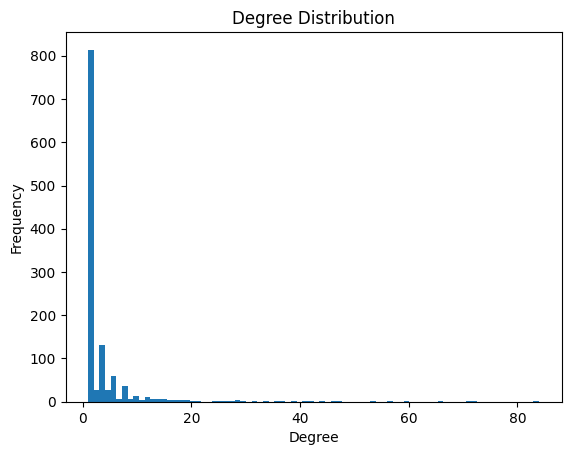

In [ ]:
## calculte the Dgree Distribution of the network ##

degree_sequence = sorted([d for n,d in G.degree()],reverse=True)## make sequence of the dgrees ##
plt.hist(degree_sequence, bins=80)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()

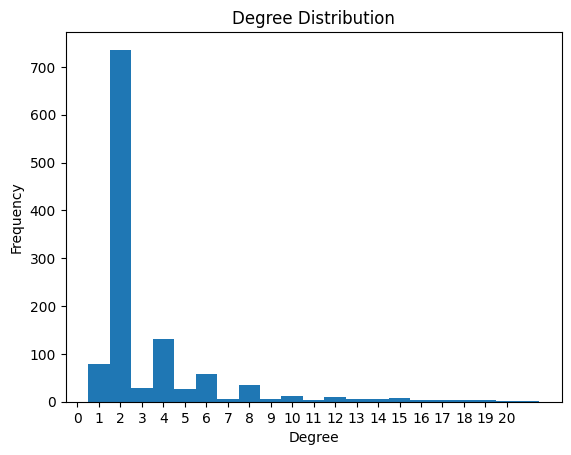

In [ ]:
## calculte the Dgree Distribution of the network when the nodes dgree under 21##


plt.hist(degree_sequence, bins=21, range=(0.5, 21.5))
plt.xticks(range(0, 21))
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()

In [ ]:
!pip install powerlaw

Text(0.5, 0, 'k')

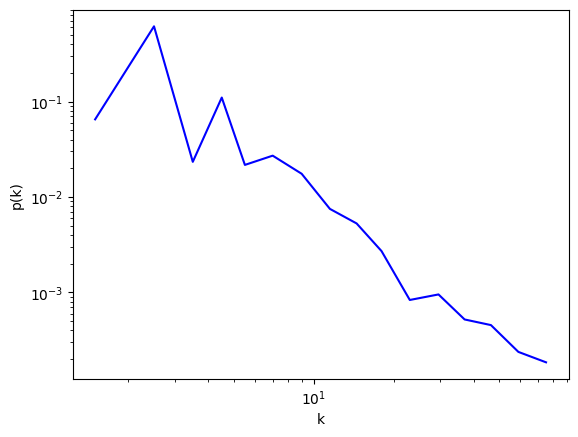

In [ ]:
## power law calc plot ##
import powerlaw
figPDF = powerlaw.plot_pdf(degree_sequence,color='b')
figPDF.set_ylabel(r"p(k)")
figPDF.set_xlabel(r"k")

In [ ]:
fit = powerlaw.Fit(degree_sequence,discrete=True)
gamma = fit.power_law.alpha
print("gamma=",gamma)

Calculating best minimal value for power law fit
gamma= 2.4397434305778973


##Dgree probability of the network

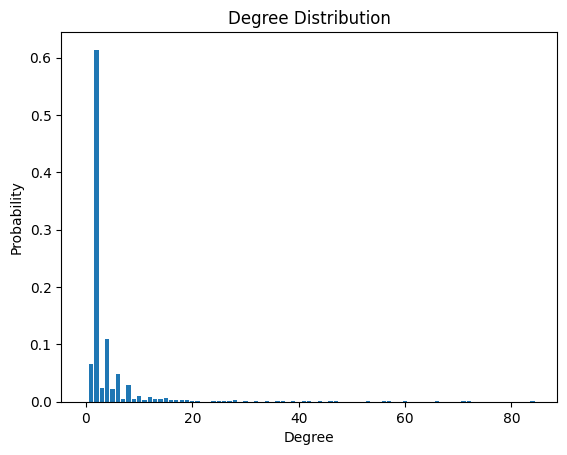

In [ ]:
## calculte the probabilty of dgree to be the dgree of random node ##


import numpy as np
import matplotlib.pyplot as plt

degree_hist = nx.degree_histogram(G)

max_degree = (len(degree_hist))
degree_hist = degree_hist[:max_degree]

# Calculate the probability by dividing the histogram by the number of nodes
degree_prob = np.array(degree_hist) / G.number_of_nodes()

# Plot the degree distribution histogram
plt.bar(np.arange(max_degree), degree_prob)
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.title('Degree Distribution')
plt.show()


##clustering coefficient of each dgree in the network

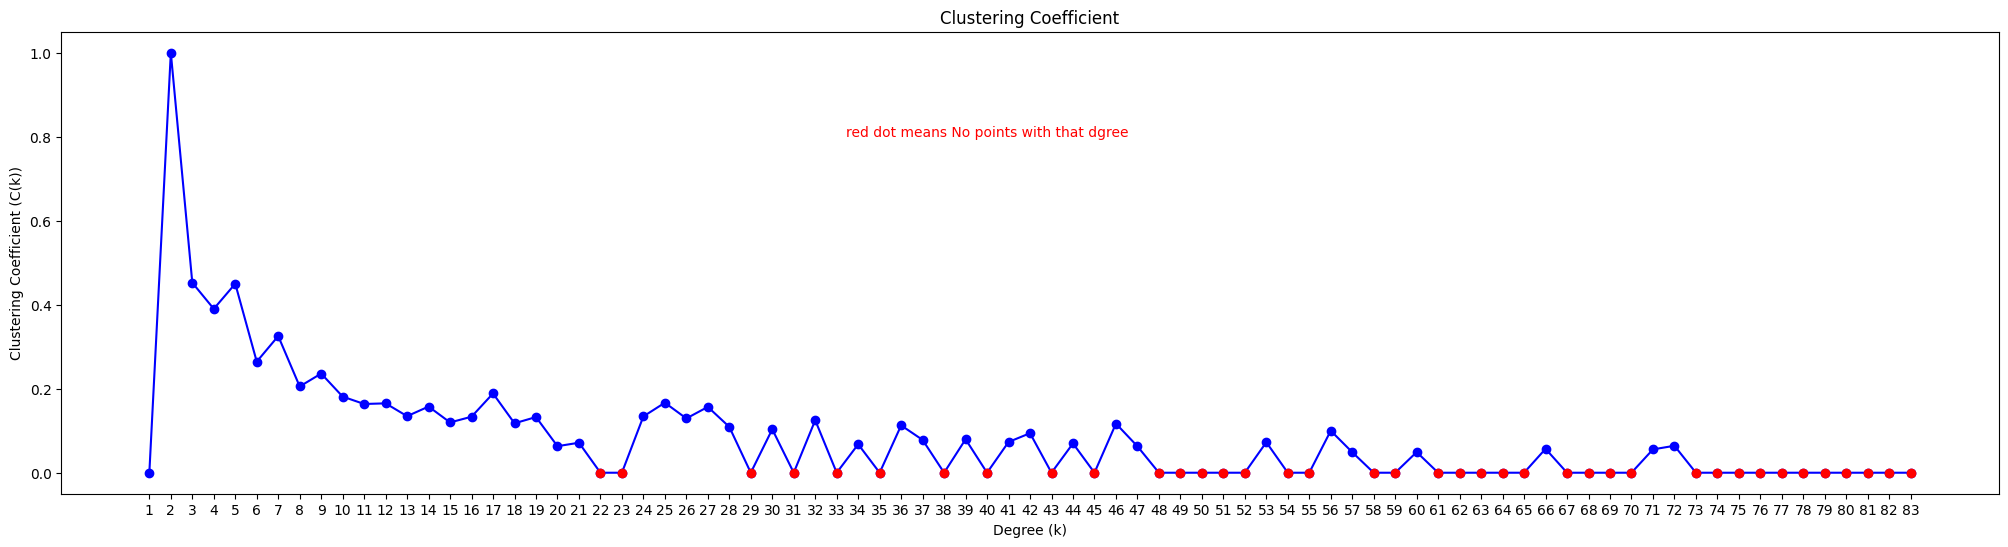

In [ ]:

# Calculate the clustering coefficient (C(k)) for each degree (k)

max_deg=max(degree_sequence)
clustering_coefficients = []
for k in range(1,max_deg):
    nodes_with_degree_k = []
    for node, degree in G.degree() :## collect all nodes with dgree k ##
      if degree == k:## if there are nodes in that dgree #
         nodes_with_degree_k.append(node)## add them to list  #
    if len(nodes_with_degree_k) !=0 : ## if the list is not empty  #
      ck = nx.average_clustering(G, nodes_with_degree_k) ## calculte the average_clustering_coefficients
      clustering_coefficients.append(ck) ## add the clustering_coefficients
    else :
      clustering_coefficients.append(-0.00001) # if there are no nodes with dgree K insert coefficient that cannot be and close to 0 ##
# Plot the degree correlation
plt.figure(figsize=(25, 6))

plt.plot(range(1,max_deg),clustering_coefficients, 'bo-')
plt.xlabel('Degree (k)')
plt.ylabel('Clustering Coefficient (C(k))')
plt.title('Clustering Coefficient')
plt.xticks(range(1, max_deg))


# Highlight the k that have no points in red
for i, cc in enumerate(clustering_coefficients):
    if cc == -0.00001:
        plt.plot(i + 1, cc, 'ro')
plt.annotate('red dot means No points with that dgree', xy=(40, 0.8), xytext=(40, 0.8),color='red', ha='center')

plt.show()

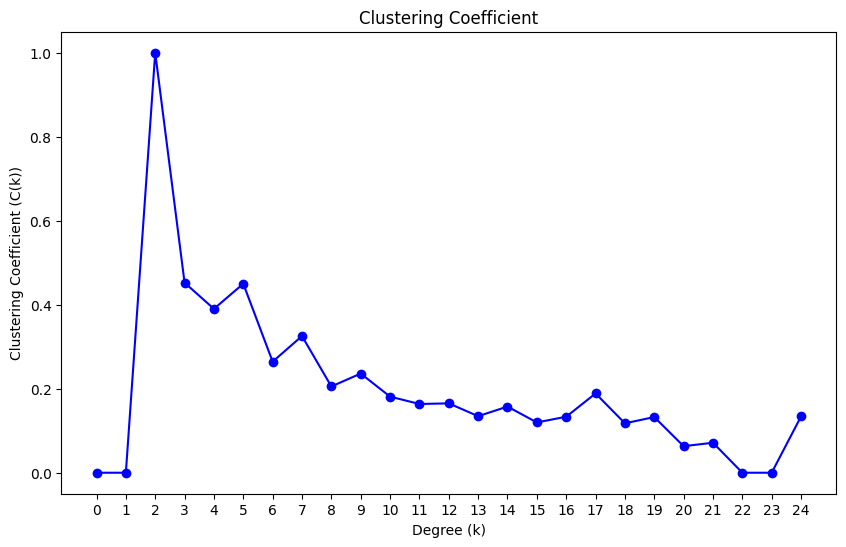

In [ ]:
#dive deeper to the first 25 ##


# Calculate the clustering coefficient (C(k)) for each degree (k)

clustering_coefficients = []
for k in range(25):
    nodes_with_degree_k = [node for node, degree in G.degree() if degree == k]
    if len(nodes_with_degree_k) !=0 :
      ck = nx.average_clustering(G, nodes_with_degree_k)
      clustering_coefficients.append(ck)
    else :
      clustering_coefficients.append(0)
# Plot the degree correlation
plt.figure(figsize=(10, 6))

plt.plot(range(25),clustering_coefficients, 'bo-')
plt.xlabel('Degree (k)')
plt.ylabel('Clustering Coefficient (C(k))')
plt.title('Clustering Coefficient')
plt.xticks(range(0, 25))


plt.show()

In [ ]:
# degree_hist = nx.degree_histogram(G)
# #degree_hist
# k_list = np.arange(0,len(degree_hist))
# #k_list
# plt.scatter(np.log(k_list),np.log(degree_hist))

## Degree correlation - average degree of a node's neighbors according the dgree

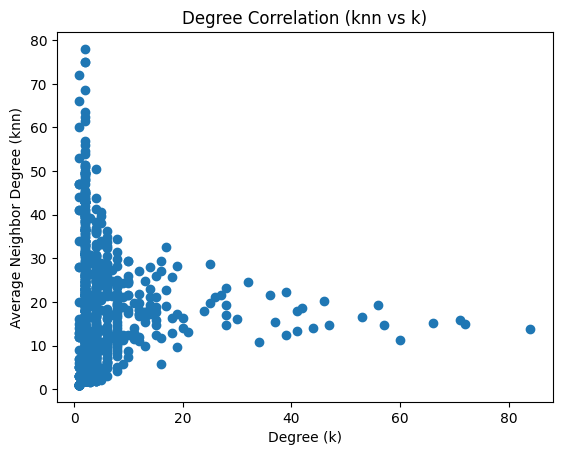

In [ ]:
# Calculate degree correlation
k_values = []
knn_values = []
for node in G.nodes():
    k = G.degree(node) ## take node dgree #
    knn = nx.average_neighbor_degree(G, nodes=[node])[node] ## calculte average_neighbor_degree##
    k_values.append(k) ## insert k to a list ##
    knn_values.append(knn) ## insert knn to a list ##

# Plot degree correlation
plt.scatter(k_values, knn_values)

plt.xlabel('Degree (k)')
plt.ylabel('Average Neighbor Degree (knn)')
plt.title('Degree Correlation (knn vs k)')
plt.show()

In [ ]:
# Calculate the clustering coefficient
clustering_coefficient = nx.average_clustering(G)

print("Clustering average Coefficient:", clustering_coefficient)

Clustering average Coefficient: 0.7092150455806546


In [ ]:
# Calculate the degree  correlation coefficient of degree between linked nodes
degree_correlation = nx.degree_assortativity_coefficient(G)

print("Degree assortativity:", degree_correlation)

Degree assortativity: 0.006161171284046982


## Network analysis 2

In [ ]:

# Perform network analysis
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)


## calculte the top 10
####  betweenness centrality
#### degree centrality
#### investors by all of thier investments

In [ ]:
## i created arc weight that is the investments/ num of the investors ##


# Sort betweenness centrality and get top 10
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Sort degree centrality and get top 10
top_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]



print("Top 10 nodes by betweenness centrality:")
for node, betweenness in top_betweenness:
    print(f"{node}: {betweenness} ")

print("\nTop 10 nodes by degree centrality:")
for node, centrality in top_degree_centrality:
    print(f"{node}: {centrality}")


# Create a dictionary to store the sum of weights for each investor
investor_investments = {}

# Iterate over the edges and aggregate the weights for each investor
for investor1,investor2, data in G.edges(data=True):
 # Accumulate the weights for each investor
    if data['total_shared_investments'] ==np.inf :
      data['total_shared_investments']=1000
    if investor1 in investor_investments:
        investor_investments[investor1] =investor_investments[investor1]+ data['total_shared_investments']
    else:
        investor_investments[investor1] = data['total_shared_investments']
    if investor2 in investor_investments:
        investor_investments[investor2] =investor_investments[investor2]+ data['total_shared_investments']
    else:
        investor_investments[investor2] = data['total_shared_investments']


top_investor = sorted(investor_investments.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nTop 10 investor by all of thier investments:")
for investor, investment in top_investor:
    print(f"{investor}: {investment}")



Top 10 nodes by betweenness centrality:
Accel: 0.09021588942539538 
Tiger Global Management: 0.08609363606181522 
Sequoia Capital China: 0.0679934254935674 
Insight Partners: 0.06725096406434847 
Lightspeed Venture Partners: 0.057757637919119656 
Andreessen Horowitz: 0.056703216662167995 
Sequoia Capital: 0.05444905186976628 
General Catalyst: 0.04701592246256928 
Tencent Holdings: 0.04518968749707456 
Coatue Management: 0.03841731574582765 

Top 10 nodes by degree centrality:
Accel: 0.07011686143572621
Andreessen Horowitz: 0.06010016694490818
Tiger Global Management: 0.05926544240400668
Insight Partners: 0.05509181969949917
Sequoia Capital China: 0.05008347245409015
Lightspeed Venture Partners: 0.04757929883138565
Sequoia Capital: 0.04674457429048414
General Catalyst: 0.044240400667779636
SoftBank Group: 0.03923205342237062
Index Ventures: 0.038397328881469114

Top 10 investor by all of thier investments:
Sequoia Capital China: 6392.23880777911
SoftBank Group: 5870.046607852532
Tencen

## Top 10 investors with the highest investments in Milions

---



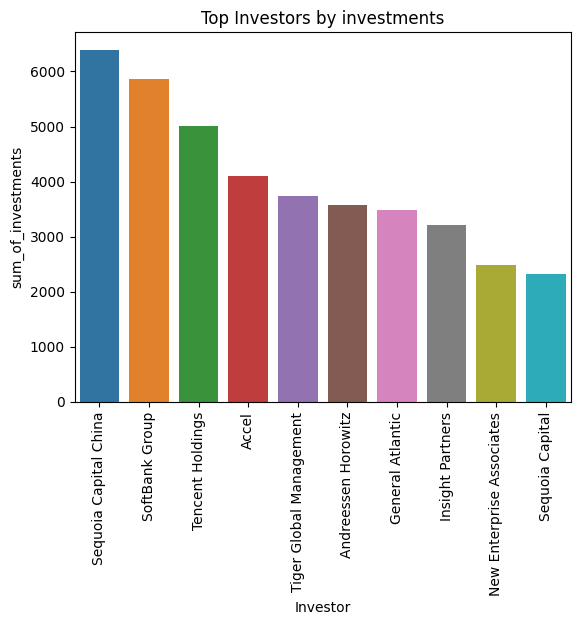

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

top_investor_dict={}

for i in top_investor:

  top_investor_dict[i[0]]=i[1]


# Convert the dictionary to a DataFrame for easier plotting
dfplot = pd.DataFrame.from_dict(top_investor_dict, orient='index', columns=['investment'])

# Sort the DataFrame in descending order based on the Betweenness values
dfplot = dfplot.sort_values(by='investment', ascending=False)

# Plot the bar plot using seaborn
sns.barplot(x=dfplot.index, y='investment', data=dfplot)

# Set the labels and title
plt.xlabel('Investor')
plt.ylabel('sum_of_investments')
plt.title('Top Investors by investments')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()


## Top 10 investors with the highest betweenness centrality

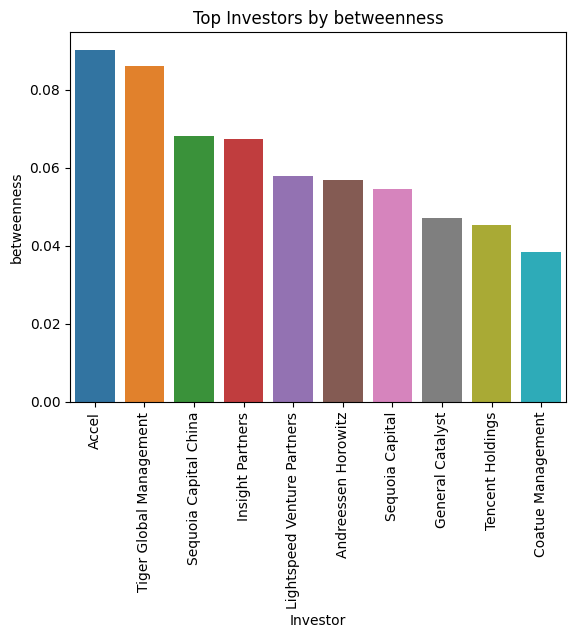

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

top_betweenness_dict={}

for i in top_betweenness:

  top_betweenness_dict[i[0]]=i[1]


# Convert the dictionary to a DataFrame for easier plotting
dfplot = pd.DataFrame.from_dict(top_betweenness_dict, orient='index', columns=['betweenness'])

# Sort the DataFrame in descending order based on the Betweenness values
dfplot = dfplot.sort_values(by='betweenness', ascending=False)

# Plot the bar plot using seaborn
sns.barplot(x=dfplot.index, y='betweenness', data=dfplot)

# Set the labels and title
plt.xlabel('Investor')
plt.ylabel('betweenness')
plt.title('Top Investors by betweenness')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [ ]:
## Top 10 investors with the highest degree centrality

## Top 10 investors with the highest dgree centrality


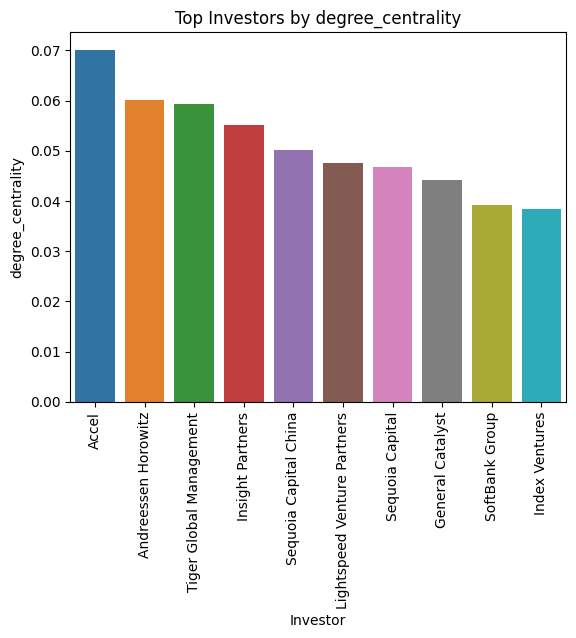

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

top_degree_centrality_dict={}

for i in top_degree_centrality:

  top_degree_centrality_dict[i[0]]=i[1]


# Convert the dictionary to a DataFrame for easier plotting
dfplot = pd.DataFrame.from_dict(top_degree_centrality_dict, orient='index', columns=['degree_centrality'])

# Sort the DataFrame in descending order based on the Betweenness values
dfplot = dfplot.sort_values(by='degree_centrality', ascending=False)

# Plot the bar plot using seaborn
sns.barplot(x=dfplot.index, y='degree_centrality', data=dfplot)

# Set the labels and title
plt.xlabel('Investor')
plt.ylabel('degree_centrality')
plt.title('Top Investors by degree_centrality')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()


## Community analysis

In [ ]:
from collections import defaultdict

communities = nx.algorithms.community.girvan_newman(G)
modularity_scores = {}

# Find the top-level community structure
top_level_communities = next(communities)
# Create a dictionary to map the node IDs to their detected community memberships
detected_communities = defaultdict(list)
for i, com in enumerate(top_level_communities):
    for node in com:
        detected_communities[i].append(node)

# Print the number of communities found
print(f"Number of communities: {len(top_level_communities)}")


Number of communities: 79


In [ ]:

## calculte for each comunnity the sum of her investments ##
community_sum_of_investmenents = {}
node_community={}
for community_id, nodes in detected_communities.items():
    community_sum_of_investmenents[community_id]=0 ## make dict with the community id with sums of investments in the community  with the defulat is 0#
    for node in nodes :
      community_sum_of_investmenents[community_id]=community_sum_of_investmenents[community_id]+investor_investments[node]
      node_community[node]=community_id ## add to each node what his community for gefi


top_5_Communities_investments=dict(sorted(community_sum_of_investmenents.items(), key=lambda x: x[1], reverse=True)[:5])



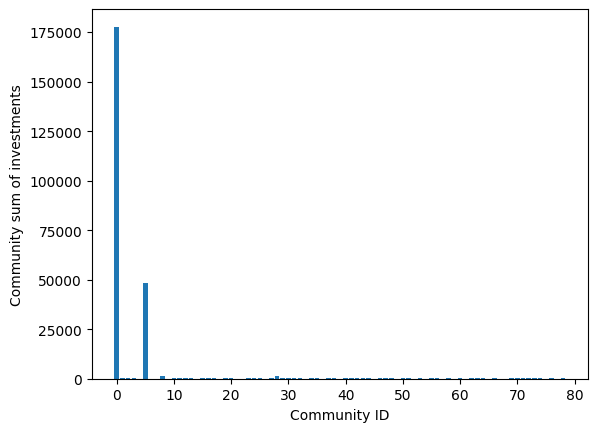

In [ ]:

##sum of community investments ##
plt.bar(community_sum_of_investmenents.keys(), community_sum_of_investmenents.values())
plt.xlabel("Community ID")
plt.ylabel("Community sum of investments")
plt.show()


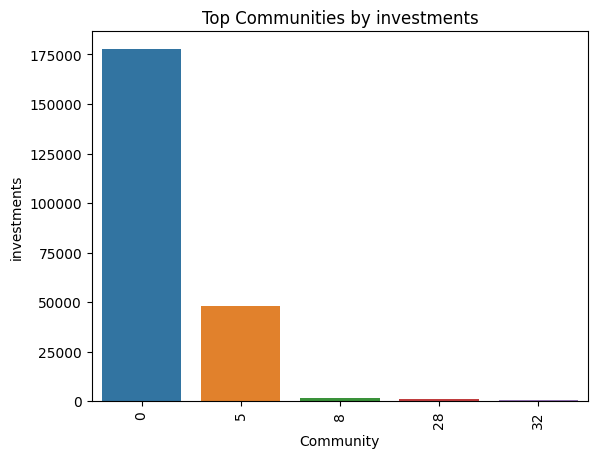

In [ ]:
import seaborn as sns
# Convert the dictionary to a DataFrame for easier plotting
dfplot = pd.DataFrame.from_dict(top_5_Communities_investments, orient='index', columns=['investments'])

# Sort the DataFrame in descending order based on the Betweenness values
dfplot = dfplot.sort_values(by='investments', ascending=False)

# Plot the bar plot using seaborn
sns.barplot(x=dfplot.index, y='investments', data=dfplot)

# Set the labels and title
plt.xlabel('Community')
plt.ylabel('investments')
plt.title('Top Communities by investments')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()

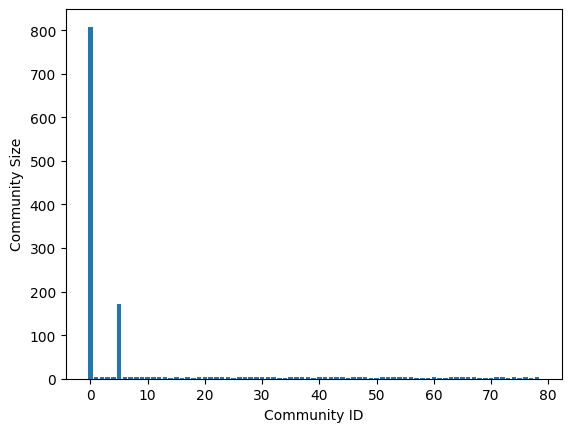

In [ ]:
## the size of each community ##

Communities_size={}
for community_id, nodes in detected_communities.items():
  Communities_size[community_id]=len(nodes)



plt.bar(Communities_size.keys(), Communities_size.values())
plt.xlabel("Community ID")
plt.ylabel("Community Size")
plt.show()

In [ ]:
top_5_Communities_size=dict(sorted(Communities_size.items(), key=lambda x: x[1], reverse=True)[:5])


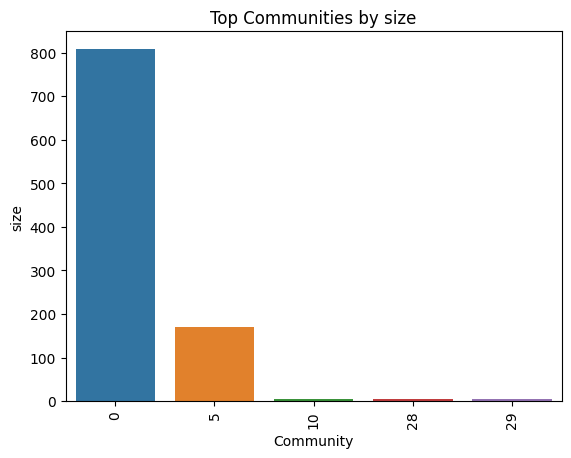

In [ ]:
import seaborn as sns
# Convert the dictionary to a DataFrame for easier plotting
dfplot = pd.DataFrame.from_dict(top_5_Communities_size, orient='index', columns=['size'])

# Sort the DataFrame in descending order based on the Betweenness values
dfplot = dfplot.sort_values(by='size', ascending=False)

# Plot the bar plot using seaborn
sns.barplot(x=dfplot.index, y='size', data=dfplot)

# Set the labels and title
plt.xlabel('Community')
plt.ylabel('size')
plt.title('Top Communities by size')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()

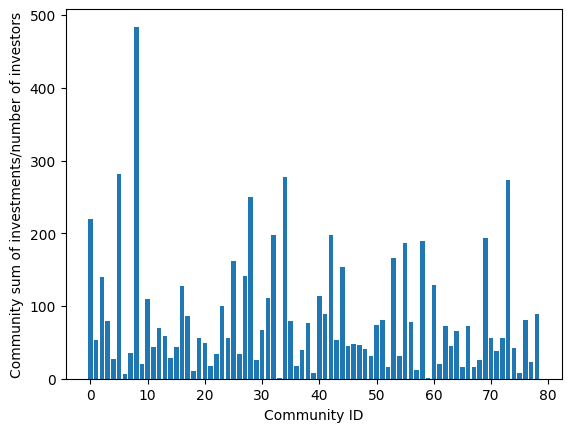

In [ ]:
## community investments ratio between the sum of investments and the size of the community
community_investments_ratio={}
for community in community_sum_of_investmenents.keys() :
  community_investments_ratio[community]=(community_sum_of_investmenents[community])/(Communities_size[community])

plt.bar(community_investments_ratio.keys(), community_investments_ratio.values())
plt.xlabel("Community ID")
plt.ylabel("Community sum of investments/number of investors")
plt.show()

In [ ]:
## top 5 Communities with the biggests ratio ##
top_5_Communities_ratio=dict(sorted(community_investments_ratio.items(), key=lambda x: x[1], reverse=True)[:5])
for community in top_5_Communities_ratio.keys() :
  print('community number ',community )
  print('that contians investors ',detected_communities[community] )
  print('the ratio between total investments to size is  ',community_investments_ratio[community] )
  print('the community size is  ',Communities_size[community] )
  print('the total sum of investmenents  ',community_sum_of_investmenents[community] )
  print('-----------------------------------------------------' )
  print('-----------------------------------------------------' )


community number  8
that contians investors  ['Qihoo 360 Technology', 'China Fortune Land Development', 'HD Capital']
the ratio between total investments to size is   484.0
the community size is   3
the total sum of investmenents   1452.0
-----------------------------------------------------
-----------------------------------------------------
community number  5
that contians investors  ['Boyu Capital', 'Hongtai Capital Holdings', 'MSA Capital', 'LTW Capital', 'Cybernaut Growth Fund', 'Microsoft', 'JD Capital Management', 'Alibaba Group', 'SeptWolves Ventures', 'Gaocheng Capital', 'Shanghai Electric Group', 'Sky9 Capital', 'TowerBrook Capital Partners', 'Telling Telecommunication Holding Co.', 'TAL Education Group', 'SAIF Partners China', 'SIG Asia Investments', 'Bertelsmann Asia Investments', 'iFly', 'XAnge Private Equity', 'Tencent Holdings', 'Morningside Venture Capital', 'Xingwang Investment Management', 'Lenovo Capital and Incubator', 'China International Capital Corporation', '

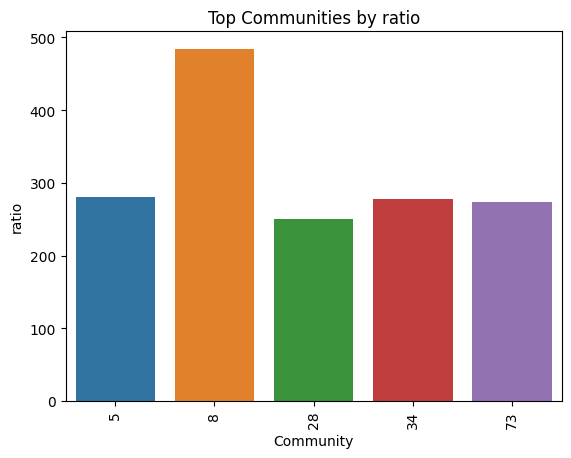

In [ ]:
import seaborn as sns
# Convert the dictionary to a DataFrame for easier plotting
dfplot = pd.DataFrame.from_dict(top_5_Communities_ratio, orient='index', columns=['ratio'])

# Sort the DataFrame in descending order based on the Betweenness values
dfplot = dfplot.sort_values(by='ratio', ascending=False)

# Plot the bar plot using seaborn
sns.barplot(x=dfplot.index, y='ratio', data=dfplot)

# Set the labels and title
plt.xlabel('Community')
plt.ylabel('ratio')
plt.title('Top Communities by ratio')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()


## export csv to gephi

In [ ]:
import pandas as pd

# Export nodes to a CSV file
nodes_data = []
for node in G.nodes():
    node_data = {
        'node': node,
        'communitie':node_community[node] ## for gefi ##
    }
    nodes_data.append(node_data)

nodes_df = pd.DataFrame(nodes_data)
nodes_df.to_csv('nodes.csv', index=False)

# Export edges to a CSV file
edges_data = []
for u, v in G.edges():
    edge_data = {
        'source': u,
        'target': v,
        'total_shared_investments': G.edges[u, v]['total_shared_investments'],
        'Times_conected':G.edges[u, v]['Times_conected']

    }
    edges_data.append(edge_data)

edges_df = pd.DataFrame(edges_data)
edges_df.to_csv('edges.csv', index=False)
